# Assignment06

# 20142740 박세인

# https://github.com/dkdvkd/assignment06

# import packages

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# given data

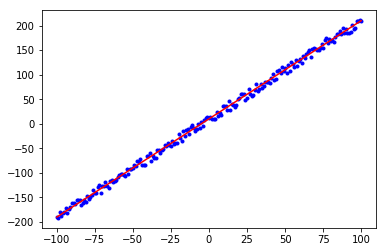

In [59]:
num     = 201
std     = 20
a       = 2 
b       = 10

n       = np.random.rand(num)
nn      = n - np.mean(n)
x       = np.linspace(-100,100,num)
y1      = a * x + nn * std + b 
y2      = a * x + b

#plt.plot(x, y1, 'b.', x, y2, 'k--')
#plt.show()

plt.plot(x, y1, 'b.', x, y2, 'r')
plt.show()


# x  : x-coordinate data
# y1 : (noisy) y-coordinate data
# y2 : (clean) y-coordinate data 
# y = f(x) = a * x + b


# find approximating line(using lib)

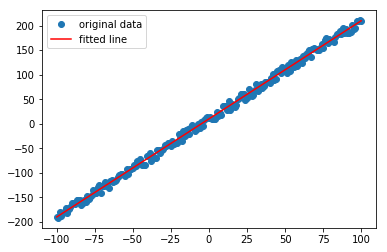

In [60]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y1)
plt.plot(x, y1, 'o', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()


# plot the noisy data(x, y1)

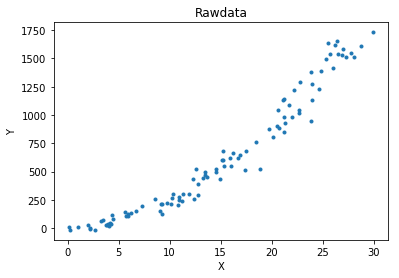

In [63]:
a, b, c = 2, 4, 1
x = np.random.rand(100)*30

def raw_func(x, a, b, c):
    noise = lambda y: np.random.randn()*(20+y/10) + y
    y = [noise(a*i**2+b*i+ c) for i in x]
    return np.array(y)

y = raw_func(x,a,b,c)

plt.title("Rawdata")
plt.plot(x, raw_func(x, a, b, c), ".")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# plot the line that fits the noisy data by the least square error

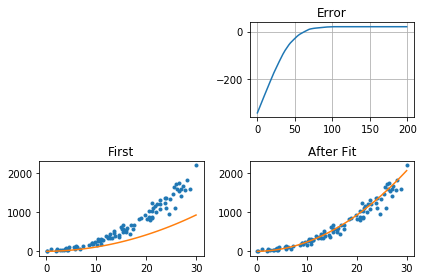

In [64]:
count = 200              # repeat number
C = np.array([1, 1, 1])  # estimated coefficients
alpha = 1E-4
new_x = np.linspace(x.min(), x.max())
error = np.zeros(count)

fit = lambda x: np.matmul(C, np.array([x**i for i in range(len(C))]))
beta = lambda fx, Y: alpha*np.mean((fx-Y)/np.abs(fx-Y))
error_func = lambda fx, Y: np.mean(fx-Y)

plt.subplot(223)
plt.title("First")
plt.plot(x, y, ".")
plt.plot(new_x, fit(new_x))

for i in range(count):
    error[i] = error_func(fit(x), y)
    C = C - np.array([beta(fit(x), y)*np.mean(x**i) for i in range(len(C))])

plt.subplot(222)
plt.title("Error")
plt.plot(range(count), error)
plt.grid()

# 점근법 완료 그래프
plt.subplot(224)
plt.title("After Fit")
plt.plot(x, y, ".")
plt.plot(new_x, fit(new_x))
plt.tight_layout()
plt.show()